# 1) Pre-Processing: Extract the Data Set and Concatenation

## 1.a) Libraries 

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import time
from sklearn import linear_model

# plot feature and overall percent variance
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

## 1.b) Data Set Original Structure 

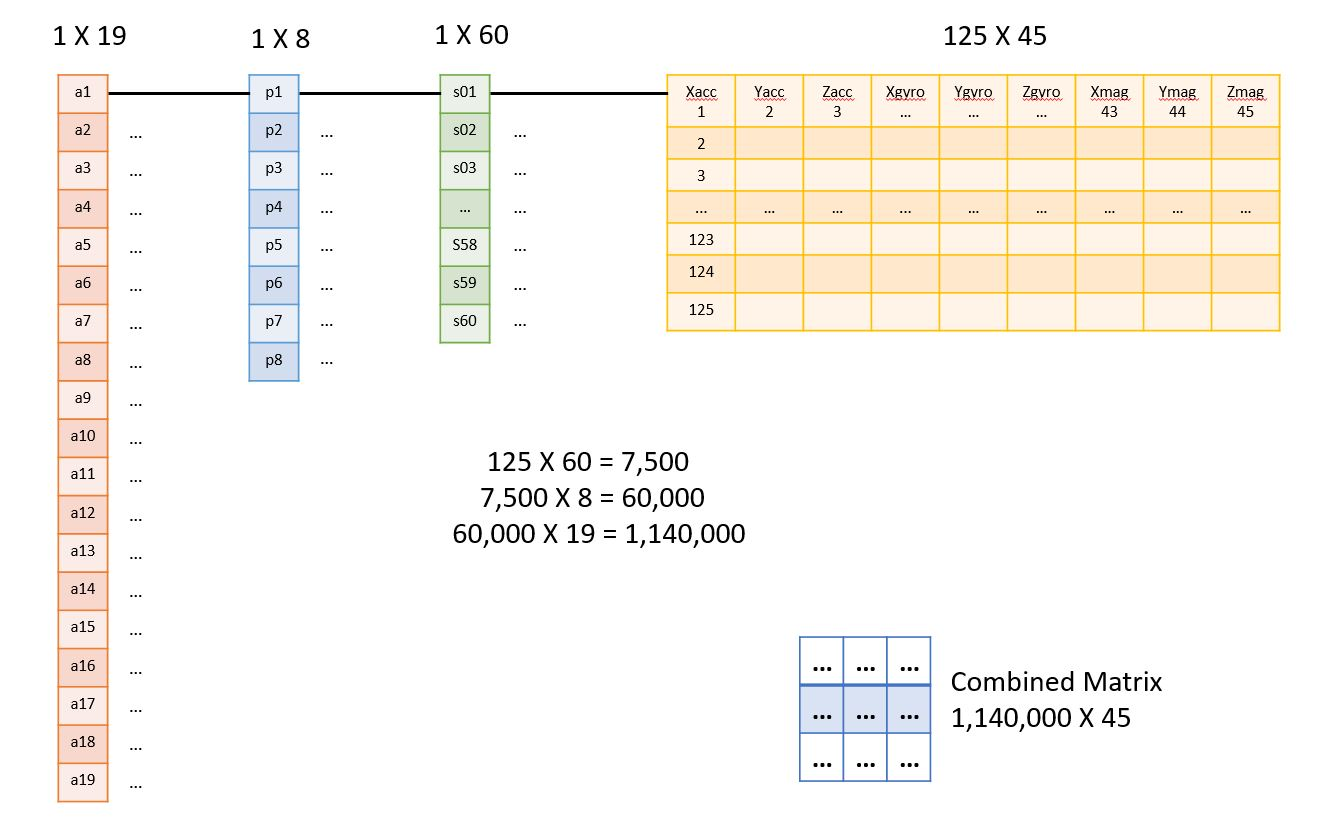

In [2]:
# display.Image(
#     'C:/Users/PazNe/CMPE_255_Data_Mining/Team5/code/RawDataSet.png'
# )

#### - The 19 activities are:

#### - Features Identification:

* T = torso
* RA = Right arm
* LA = Left arm
* RL = Right leg
* LL = Left leg
* x, y, z = Axes 
* acc = Accelerometer
* gyro = Gyroscope
* mag = Magnetometer


### 1.c) Loading data set from a01 to a19 for all subjects (p1 to p8) and all segments (s01 to s60) into a single Matrix

#### Loading for Nelson's Computer

In [3]:
# complete_data = pd.DataFrame()
# start = time.time()
# for i in range(1,20):
    
#     if i < 10:
#         activity_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team5/data/a0'+ str(i))
#         a='a0'+str(i)
#     else:
#         activity_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team5/data/a'+ str(i))    
#         a='a'+str(i)
        
#     for j in range(1, 9):
#         person_folder = os.listdir('C:/Users/PazNe/CMPE_255_Data_Mining/Team5/data/'+ a +'/p'+str(j))
#         p='p'+str(j)
#         for file in person_folder:
#             filepath = 'C:/Users/PazNe/CMPE_255_Data_Mining/Team5/data/'+a+'/'+p+'/'+ file
    
#             data = pd.read_csv(filepath, header=None)
        
#             #Adding Column 46 to Include the Activity Number corresponding to each Row.
#             data[45]=i
#             complete_data=complete_data.append(data)
#     print('Matrix shape after combining: '+a ,complete_data.shape)
# end = time.time()
# duration_with_svd = end-start
# print("Time taken to compile data set into a single matrix: %d seconds" %duration_with_svd)

Matrix shape after combining: a01 (60000, 46)
Matrix shape after combining: a02 (120000, 46)
Matrix shape after combining: a03 (180000, 46)
Matrix shape after combining: a04 (240000, 46)
Matrix shape after combining: a05 (300000, 46)
Matrix shape after combining: a06 (360000, 46)
Matrix shape after combining: a07 (420000, 46)
Matrix shape after combining: a08 (480000, 46)
Matrix shape after combining: a09 (540000, 46)
Matrix shape after combining: a10 (600000, 46)
Matrix shape after combining: a11 (660000, 46)
Matrix shape after combining: a12 (720000, 46)
Matrix shape after combining: a13 (780000, 46)
Matrix shape after combining: a14 (840000, 46)
Matrix shape after combining: a15 (900000, 46)
Matrix shape after combining: a16 (960000, 46)
Matrix shape after combining: a17 (1020000, 46)
Matrix shape after combining: a18 (1080000, 46)
Matrix shape after combining: a19 (1140000, 46)
Time taken to compile data set into a single matrix: 577 seconds


#### Loading for Sajit's Computer

In [ ]:
complete_data = pd.DataFrame()
start = time.time()
for i in range(1,20):
    
    if i < 10:
        activity_folder = os.listdir('/Users/sajitjumani/Documents/SJSU/CMPE-255/TeamProject/data/a0'+ str(i))
        a='a0'+str(i)
    else:
        activity_folder = os.listdir('/Users/sajitjumani/Documents/SJSU/CMPE-255/TeamProject/data/a'+ str(i))    
        a='a'+str(i)
        
    for j in range(1, 9):
        person_folder = os.listdir('/Users/sajitjumani/Documents/SJSU/CMPE-255/TeamProject/data/'+ a +'/p'+str(j))
        p='p'+str(j)
        for file in person_folder:
            filepath = '/Users/sajitjumani/Documents/SJSU/CMPE-255/TeamProject/data/'+a+'/'+p+'/'+ file
    
            data = pd.read_csv(filepath, header=None)
        
            #Adding Column 46 to Include the Activity Number corresponding to each Row.
            data[45]=i
            complete_data=complete_data.append(data)
    print('Matrix shape after combining: '+a ,complete_data.shape)
end = time.time()
duration_with_svd = end-start
print("Time taken to compile data set into a single matrix: %d seconds" %duration_with_svd)

In [4]:
#Labels for Columns: 
complete_data.columns=['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro','T_ygyro','T_zgyro','T_xmag', 'T_ymag', 'T_zmag', 
'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro','RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro','LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag', 
'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro','RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro','LL_ygyro','LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag', 'Activity']

In [5]:
# Data collected by the 45 sensors for the 19 Activities done by the 8 people.
complete_data

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Activity
0,8.13050,1.03490,5.42170,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.157300,0.70097,...,-2.8071,-9.0812,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730,1
1,8.13050,1.02020,5.38430,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.158900,0.71829,...,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514,1
2,8.16040,1.02010,5.36220,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.158790,0.69849,...,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219,1
3,8.16030,1.00520,5.37700,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.159120,0.72799,...,-2.8071,-9.0811,2.6070,-0.005725,0.009620,0.006555,0.74029,0.30184,-0.057750,1
4,8.16050,1.02750,5.34730,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.159160,0.71572,...,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.30090,-0.057527,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,16.00800,-2.01660,-0.58220,2.027100,1.656800,0.584410,-0.73195,-0.476070,-0.013494,16.43100,...,-10.7520,4.3231,-4.5931,-0.230600,0.180890,-2.082300,0.56876,0.39409,0.518170,19
121,8.28230,-0.69936,0.48698,2.887900,1.603900,-0.020417,-0.73055,-0.472470,-0.012385,7.01620,...,-5.1838,1.2551,-4.1113,1.817200,0.312510,-1.021600,0.53822,0.43745,0.504010,19
122,2.71210,0.49967,0.84053,1.996400,1.465800,-0.072605,-0.72533,-0.478630,-0.012810,-4.55400,...,-1.0348,15.6940,1.2942,1.842100,0.349400,-0.282080,0.51752,0.47280,0.489250,19
123,2.03080,-0.71349,-0.11264,1.766100,1.010300,-0.102120,-0.71933,-0.482240,-0.011469,-6.85690,...,-3.6479,-7.4632,-12.3640,-0.150260,1.563400,-0.368450,0.50440,0.51029,0.446480,19


In [6]:
#Separate the Data from the Classes (Targets). 

X_raw = complete_data.iloc[:,:45]     # X_raw is a df 1140000 rows x 45 columns
y_raw = complete_data.iloc[:,-1]      # y_raw is a df 1140000 rows x 1 column. 

### 1.d) Saving the X_raw and Y_raw as pickle files into local directory

In [7]:
# Data Saved to local drive to speed up iterations of preprocessing. (To avoid recompiling the raw data)

X_raw.to_pickle('X_raw.pkl')
y_raw.to_pickle('y_raw.pkl')

# -------------------------------------------------------------------------

# 2) Preprocessing

## 2.a) Loading libraries

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## 2.b) Data Standardization and Variance Analysis

In [9]:
# Reload X_raw and y_raw from Local Drive

X_raw = pd.read_pickle('X_raw.pkl')
y_raw = pd.read_pickle('y_raw.pkl')


###  Using StandardScaler to standarize the dataset into unit scales (mean = 0 and variance = 1)

In [10]:
X_std = StandardScaler().fit_transform(X_raw)
X_std.shape

(1140000, 45)

### Alternate way to standardize and normalize

#the indices of the rows keep repeating every 125 rows. Reset the indices
Alt_X_raw = X_raw.reset_index(drop=True)
Alt_Y_raw = y_raw.resent_index(drop=True)

#Convert to Numpy data 
X = df3.to_numpy()

#Standardize and normalize the data in sections of 7500 rows
starting_points = range(0,len(X)+1,7500) #added the +1 so you get the last index
Alt_X_std = np.empty(X.shape)
count = 0
for i in range(len(starting_points)-1):
    X_a = X[starting_points[i]:starting_points[i+1]]
    X_ax = StandardScaler().fit_transform(X_a)
    X_axn = preprocessing.normalize(X_ax, norm = 'l2', axis = 0)
    Alt_X_std[starting_points[i]:starting_points[i+1], :] = X_axn

#rename the variable for the next steps of analysis
X_std = Alt_X_std

In [11]:
# Computing the Covariance Matrix
X_sm = X_std
X_cov = X_sm.T.dot(X_sm) / (X_sm.shape[0] - 1)

# Perform the eigendecomposition of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(X_cov)

In [12]:
def percvar(v):
    """Transform eigen/singular values into percents.
    Return: vector of percents, prefix vector of percents
    """
    # sort values
    s = np.sort(np.abs(v))
    # reverse sorting order
    s = s[::-1]
    # normalize
    s = s/np.sum(s)
    return s, np.cumsum(s)
print("eigenvalues:    ", eig_vals)
pct, pv = percvar(eig_vals)
print("percent values: ", pct)
print("prefix vector:  ", pv)

eigenvalues:     [5.94925544 5.08965484 3.49066243 2.62163963 1.98432653 1.60852254
 1.55318668 1.52652034 1.48942255 1.24562937 1.17867867 1.16164134
 1.08064068 1.04611417 0.96530666 0.90531748 0.86429856 0.84133456
 0.810782   0.78435298 0.71010623 0.67925309 0.64631549 0.61210055
 0.60157498 0.54459872 0.08079    0.09542987 0.11111812 0.14111989
 0.12400694 0.12696877 0.51456235 0.49733088 0.45635433 0.41493837
 0.39744966 0.18482402 0.19691699 0.21394258 0.24799887 0.26872089
 0.29788336 0.31318666 0.32526039]
percent values:  [0.13220556 0.11310334 0.07757021 0.05825861 0.04409611 0.03574491
 0.03451523 0.03392264 0.03309825 0.02768063 0.02619284 0.02581423
 0.02401422 0.02324696 0.02145124 0.02011815 0.01920662 0.01869631
 0.01801736 0.01743005 0.01578012 0.0150945  0.01436255 0.01360222
 0.01336832 0.01210218 0.01143471 0.01105179 0.0101412  0.00922084
 0.00883221 0.007228   0.0069597  0.00661962 0.00597157 0.00551108
 0.00475428 0.00437593 0.0041072  0.00313599 0.00282153 0.00

In [13]:
def perck(s, p):
    s = [x for x in s if x <= p]
    return len(s)

for p in [40, 60, 80, 85, 90, 95, 99, 100]:
    print("Number of dimensions to account for %d%% of the variance: %d" % (p, perck(pv, p*0.01)))

Number of dimensions to account for 40% of the variance: 4
Number of dimensions to account for 60% of the variance: 10
Number of dimensions to account for 80% of the variance: 19
Number of dimensions to account for 85% of the variance: 23
Number of dimensions to account for 90% of the variance: 26
Number of dimensions to account for 95% of the variance: 32
Number of dimensions to account for 99% of the variance: 40
Number of dimensions to account for 100% of the variance: 44


* It seems that 32 dimensions capture 95% of the variance in the original data set.  

## 2.c) Logistic Regression (Baseline)

Checking the accuracy of the data before implementing Dimensionality Reduction. 
This extra step helps us better understand how the different methods of dimensionality reduction can affect the performance and accuracy of the model.

This model has parameters: n_plist=5 , n_repeats=2.
Scoring for accucary gives us a mean Accuracy of 85.61% with a very small Std (0.00045). 

In [14]:
# from sklearn.linear_model import LogisticRegression       
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold 

In [15]:
# model_1 = LogisticRegression(class_weight='balanced')

# cv_1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
# scores_1 = cross_val_score(model_1, X_std, y_raw, scoring='accuracy', cv=cv_1, n_jobs=-1)

# print(f'Accuracy: {np.mean(scores_1): .5f}(std: {np.std(scores_1): .5f})')

Accuracy:  0.85613(std:  0.00045)


## 2.c) Computing PCA for Dimesionality Reduction

* PCA is an unsupervised linear dimensionality reduction technique that helps us to denty patterns in the data based of the correlation between features. 
* Based on results from the perck function, we selected 32 dimensions to capture 95% of the variance of the original data set.

In [16]:
pca = PCA(n_components = 32)
X_PCA = pca.fit_transform(X_std)

In [17]:
X_PCA.shape

(1140000, 32)

* Checking the Accuracy of the model after PCA was implented and n_components were down to 32.

In [18]:
# model_check_PCA = LogisticRegression(class_weight='balanced')

# cv_2 = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
# scores_2 = cross_val_score(model_check_PCA, X_PCA, y_raw, scoring='accuracy', cv=cv_2, n_jobs=-1)

# print(f'Accuracy: {np.mean(scores_2): .5f}(std: {np.std(scores_2): .5f})')

## 2.d) Splitting the Data into Training (90%) and Test (10%)

In [19]:
#Split the data into train and test
#random_state=10 TO KEEP THE SET selection Constant. 
X_train, X_test, y_train, y_test = train_test_split(X_PCA,y_raw, test_size=0.1, random_state = 10)
len(X_test), len(y_test), len(X_train), len(y_train), 

(114000, 114000, 1026000, 1026000)

In [20]:
# Saving the four files on Local Directory as txt
np.savetxt('X_train.txt', X_train, delimiter=",", newline="\n")
np.savetxt('y_train.txt', y_train, delimiter=",", newline="\n")
np.savetxt('X_test.txt', X_test, delimiter=",", newline="\n")
np.savetxt('y_test.txt', y_test, delimiter=",", newline="\n")

# -------------------------------------------------------------------------

# 3) CLASSIFICATION METHODS

## 3.a) First Classification Model: "ANN"

In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
import matplotlib.pyplot as pt
%matplotlib inline

### 2-Layer ANN: No hidden layer

In [22]:
model1 = keras.Sequential([
    keras.layers.Dense(20, input_shape=(32,),activation= 'sigmoid')
])
model1.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model1.fit(X_train, y_train, epochs=5)

Epoch 1/5
32063/32063 [==============================] - 19s 579us/step - loss: 0.7892 - accuracy: 0.7549
Epoch 2/5
32063/32063 [==============================] - 19s 582us/step - loss: 0.6948 - accuracy: 0.7737
Epoch 3/5
32063/32063 [==============================] - 19s 590us/step - loss: 0.6898 - accuracy: 0.7744
Epoch 4/5
32063/32063 [==============================] - 19s 589us/step - loss: 0.6879 - accuracy: 0.7740
Epoch 5/5
32063/32063 [==============================] - 19s 580us/step - loss: 0.6870 - accuracy: 0.7741


In [23]:
model1.evaluate(X_test, y_test)

3563/3563 [==============================] - 2s 499us/step - loss: 0.6803 - accuracy: 0.7784


[0.6802822947502136, 0.7784035205841064]

In [24]:
# This will predict all activitiyes and output and array of scores
y_predicted1 = model1.predict(X_test)

# To select item # 5 from the list and look ate the array of scores for A1 - A19
y_predicted1[5]

array([1.3284991e-06, 6.7051083e-02, 6.2311757e-01, 8.7652687e-08,
       1.2390161e-07, 8.8373411e-01, 2.6726425e-03, 9.4406867e-01,
       2.5781938e-01, 7.8456700e-01, 8.9597732e-01, 9.9422467e-01,
       5.1877856e-01, 9.7734380e-01, 1.2125702e-06, 3.0385065e-06,
       3.8077354e-02, 1.4978647e-04, 7.0071340e-01, 9.7614026e-01],
      dtype=float32)

In [25]:
# Pick the maximun Score from the prdicted array of scores. 
np.argmax(y_predicted1[5])

11

In [26]:
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]
y_predicted_labels1[:5]

[5, 6, 5, 2, 14]

In [27]:
y_test[0:5]

4      5
13     6
9      5
64    13
26    14
Name: Activity, dtype: int64

In [28]:
print("Classification Report for 2 Layes Network: \n", classification_report(y_test, y_predicted_labels1))

Classification Report for 2 Layes Network: 
               precision    recall  f1-score   support

           1       0.46      1.00      0.63      6061
           2       0.52      0.63      0.57      5924
           3       0.70      0.88      0.78      6003
           4       1.00      0.63      0.78      6051
           5       0.84      0.92      0.88      5952
           6       0.73      0.80      0.77      6009
           7       0.64      0.68      0.66      6069
           8       0.59      0.53      0.56      6006
           9       0.65      0.60      0.62      5931
          10       0.70      0.74      0.72      5985
          11       0.57      0.56      0.56      6057
          12       0.68      0.70      0.69      5992
          13       0.86      0.94      0.90      6074
          14       0.93      0.98      0.95      5948
          15       0.90      0.77      0.83      6023
          16       0.96      0.97      0.97      6045
          17       1.00      0.09   

In [29]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels1)
cm1

<tf.Tensor: shape=(20, 20), dtype=int32, numpy=
array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6058,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    3,    0,    0,    0,    0,    0],
       [   0,    0, 3740,    0,    0,    1,   32,    0,    0,  731,    0,
           0,    0,    0,    0,    0,    0,    0, 1419,    1],
       [   0,  730,    0, 5273,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 2219, 3832,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   35,    0,    0, 5448,    0,    6,  277,   31,    0,
           8,    3,    0,    0,    0,    9,    1,  115,   19],
       [   0,    0,   45,    0,    0,    0, 4808,  393,  601,   54,    0,
           0,    0,    0,    0,    0,    0,    0,  104, 

Text(131.28000000000003, 0.5, 'Thruth')

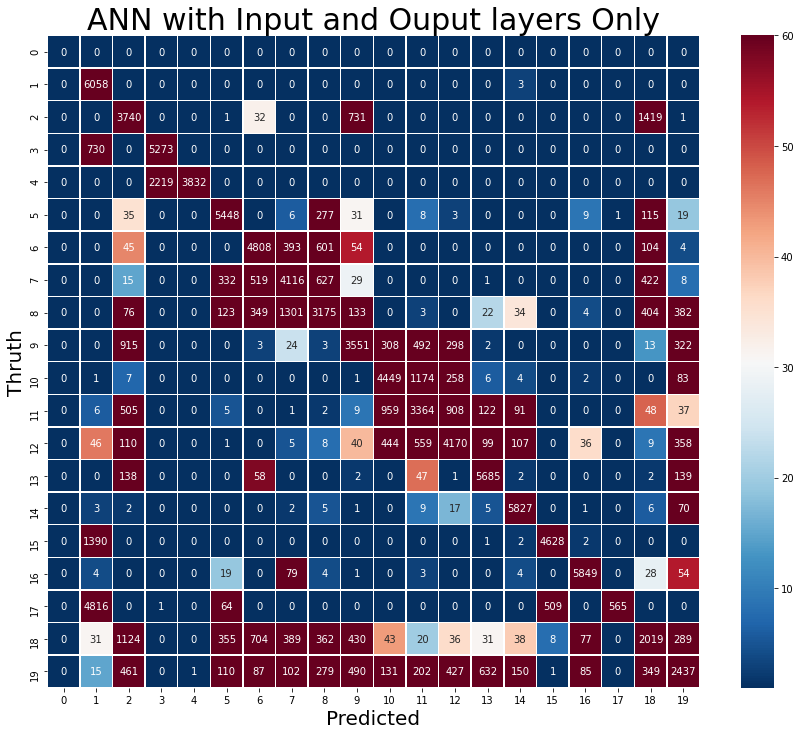

In [30]:
import seaborn as sn
plt.figure(figsize = (15,12))
b = sn.heatmap(cm1, annot=True, fmt='d', linewidths=.5, square=True, cmap='RdBu_r', vmin=1 , vmax=60)
b.axes.set_title("ANN with Input and Ouput layers Only",fontsize=30)
b.set_xlabel("Predicted",fontsize=20)
b.set_ylabel("Thruth",fontsize=20)

___

### 3-Layer ANN: 1 hidden layer

In [31]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(32,),activation= 'relu'),
    keras.layers.Dense(20,activation= 'sigmoid')
])
model2.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
32063/32063 [==============================] - 22s 668us/step - loss: 0.1056 - accuracy: 0.9685
Epoch 2/5
32063/32063 [==============================] - 21s 662us/step - loss: 0.0436 - accuracy: 0.9856
Epoch 3/5
32063/32063 [==============================] - 21s 669us/step - loss: 0.0371 - accuracy: 0.9872
Epoch 4/5
32063/32063 [==============================] - 21s 659us/step - loss: 0.0339 - accuracy: 0.9881
Epoch 5/5
32063/32063 [==============================] - 21s 659us/step - loss: 0.0319 - accuracy: 0.9888


In [32]:
model2.evaluate(X_test, y_test)

3563/3563 [==============================] - 2s 517us/step - loss: 0.0333 - accuracy: 0.9888


[0.0332549586892128, 0.9888333082199097]

In [33]:
# y_predicted for teh second Model (With a hidden layer)
y_predicted2 = model2.predict(X_test)
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]

In [34]:
print("Classification Report for 3 Layes Network: \n", classification_report(y_test, y_predicted_labels2))

Classification Report for 3 Layes Network: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      6061
           2       1.00      1.00      1.00      5924
           3       1.00      1.00      1.00      6003
           4       1.00      1.00      1.00      6051
           5       1.00      0.95      0.97      5952
           6       0.94      0.99      0.96      6009
           7       0.94      1.00      0.97      6069
           8       0.99      0.91      0.95      6006
           9       1.00      0.99      1.00      5931
          10       0.99      0.99      0.99      5985
          11       0.99      0.99      0.99      6057
          12       0.99      0.98      0.99      5992
          13       0.99      1.00      0.99      6074
          14       1.00      1.00      1.00      5948
          15       0.96      0.99      0.98      6023
          16       1.00      1.00      1.00      6045
          17       1.00      0.96   

In [35]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2)

Text(131.28000000000003, 0.5, 'Thruth')

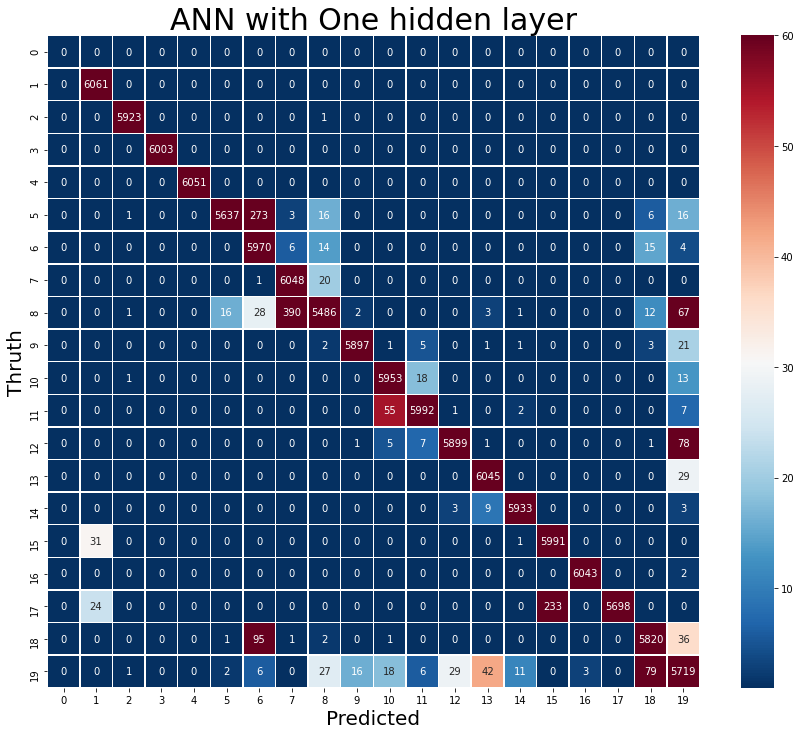

In [36]:
import seaborn as sn
plt.figure(figsize = (15,12))
b = sn.heatmap(cm2, annot=True, fmt='d', linewidths=.5, square=True, cmap='RdBu_r', vmin=1 , vmax=60)
b.axes.set_title('ANN with One hidden layer',fontsize=30)
b.set_xlabel('Predicted',fontsize=20)
b.set_ylabel('Thruth',fontsize=20)

### 4-Layer ANN: 2 hidden layers

In [37]:
model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(32,),activation= 'relu'),
    keras.layers.Dense(100,activation= 'relu'),
    keras.layers.Dense(20,activation= 'sigmoid')
])
model3.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model3.fit(X_train, y_train, epochs=5)

Epoch 1/5
32063/32063 [==============================] - 23s 717us/step - loss: 0.0797 - accuracy: 0.9741
Epoch 2/5
32063/32063 [==============================] - 23s 725us/step - loss: 0.0349 - accuracy: 0.9872
Epoch 3/5
32063/32063 [==============================] - 23s 732us/step - loss: 0.0288 - accuracy: 0.9893
Epoch 4/5
32063/32063 [==============================] - 23s 730us/step - loss: 0.0257 - accuracy: 0.9904
Epoch 5/5
32063/32063 [==============================] - 23s 726us/step - loss: 0.0235 - accuracy: 0.9910


In [38]:
model3.evaluate(X_test, y_test)

3563/3563 [==============================] - 2s 520us/step - loss: 0.0272 - accuracy: 0.9908


[0.027155524119734764, 0.9907982349395752]

In [39]:
# y_predicted for the third Model (With Two hidden layers)
y_predicted3 = model3.predict(X_test)
y_predicted_labels3 = [np.argmax(i) for i in y_predicted3]

In [40]:
print("ANN Class Report for 2 Hidden Layers: \n", classification_report(y_test, y_predicted_labels3))

ANN Class Report for 2 Hidden Layers: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      6061
           2       1.00      1.00      1.00      5924
           3       1.00      1.00      1.00      6003
           4       1.00      1.00      1.00      6051
           5       0.94      1.00      0.97      5952
           6       0.98      0.95      0.97      6009
           7       0.97      1.00      0.99      6069
           8       0.99      0.96      0.98      6006
           9       0.99      1.00      1.00      5931
          10       0.99      0.99      0.99      5985
          11       0.99      0.99      0.99      6057
          12       0.98      0.99      0.99      5992
          13       0.99      1.00      0.99      6074
          14       1.00      0.99      1.00      5948
          15       1.00      1.00      1.00      6023
          16       1.00      1.00      1.00      6045
          17       1.00      1.00      1.

In [41]:
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels3)

Text(131.28000000000003, 0.5, 'Thruth')

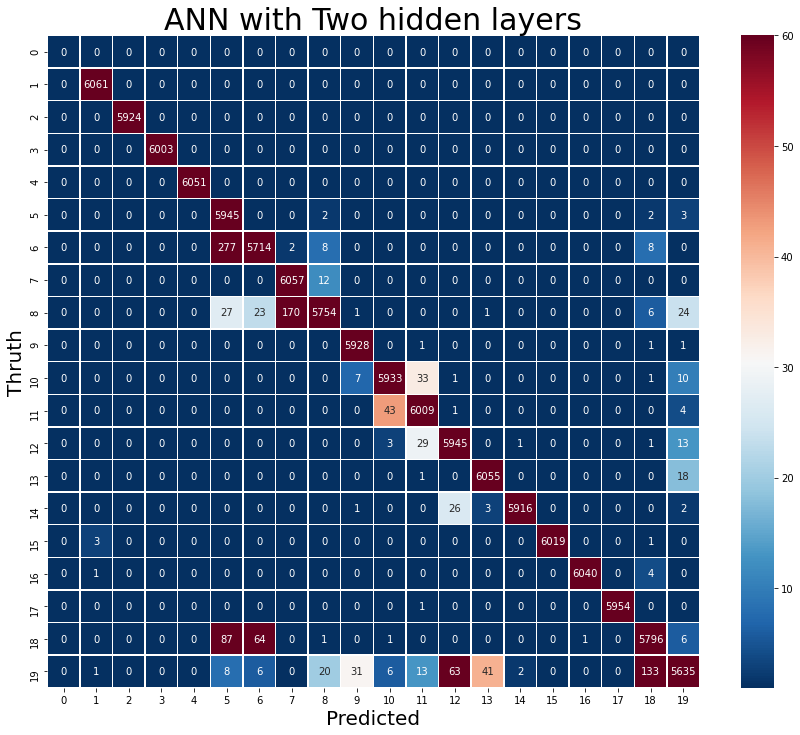

In [42]:
import seaborn as sn
plt.figure(figsize = (15,12))
b = sn.heatmap(cm3, annot=True, fmt='d', linewidths=.5, square=True, cmap='RdBu_r', vmin=1 , vmax=60)
b.axes.set_title('ANN with Two hidden layers',fontsize=30)
b.set_xlabel('Predicted',fontsize=20)
b.set_ylabel('Thruth',fontsize=20)

___

## 3.b) Second Classification Model: "Random Forest"


### Libraries

In [43]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt

### Random Forest Classifier

In [44]:
###X_train, X_test, y_train, y_test - keep this for reference

##Code to find if there is a trend where score improves with estimator qty
e_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
RFscore_list = []

for e in e_list:
    clfRF = RandomForestClassifier(n_estimators = e)
    clfRF.fit(X_train, y_train)
    y_pred = clfRF.predict(X_test)
    RFscore = clfRF.score(X_test, y_test)
    print("estimator qty", e, "score:", RFscore)
    RFscore_list.append(RFscore)

estimator qty 1 score: 0.9221052631578948
estimator qty 2 score: 0.9153421052631578
estimator qty 3 score: 0.9517017543859649
estimator qty 4 score: 0.9635175438596492
estimator qty 5 score: 0.9720263157894737
estimator qty 6 score: 0.9744824561403509
estimator qty 7 score: 0.9773157894736842
estimator qty 8 score: 0.9781666666666666
estimator qty 9 score: 0.9798947368421053
estimator qty 10 score: 0.9809210526315789


Text(0.5, 1.0, 'Effect of Tree Qty on RF Classification Score')

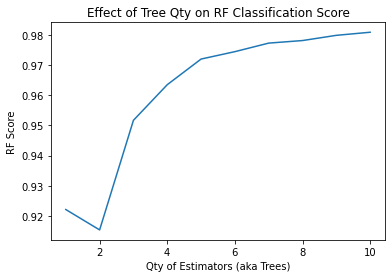

In [45]:
plt.figure(1)#, figsize=(20,30))
plt.plot(e_list, RFscore_list)
plt.ylabel('RF Score')
plt.xlabel('Qty of Estimators (aka Trees)')
plt.title('Effect of Tree Qty on RF Classification Score')

In [46]:
target_names = ['a01', 'a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         a01       1.00      1.00      1.00      6061
         a02       1.00      1.00      1.00      5924
         a03       1.00      1.00      1.00      6003
         a04       1.00      1.00      1.00      6051
         a05       0.97      0.95      0.96      5952
         a06       0.91      0.99      0.95      6009
         a07       1.00      0.99      0.99      6069
         a08       0.97      0.94      0.95      6006
         a09       0.98      1.00      0.99      5931
         a10       0.98      0.99      0.98      5985
         a11       0.99      0.98      0.98      6057
         a12       0.98      0.99      0.99      5992
         a13       0.98      0.99      0.98      6074
         a14       0.99      0.99      0.99      5948
         a15       1.00      1.00      1.00      6023
         a16       1.00      1.00      1.00      6045
         a17       1.00      1.00      1.00      5955
         a18       0.97    

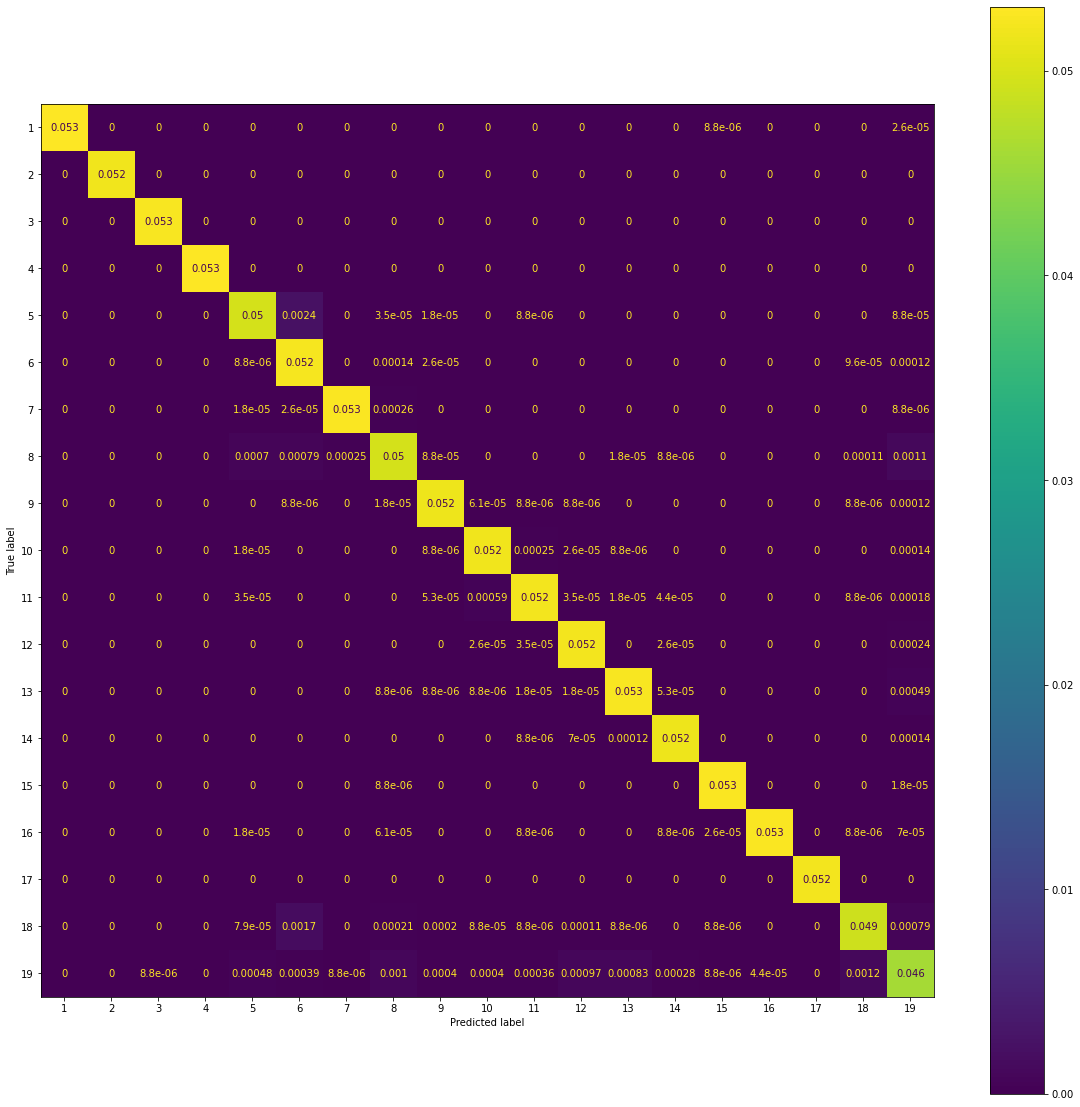

In [47]:
#confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(clfRF, X_test, y_test, normalize = "all", ax = ax)

### [edit the variables for the professor] Random Forest Code for Professor to Run

In [ ]:
# #Professor should uncomment this code and run

# clfRF = RandomForestClassifier(n_estimators = 4) #chose 4 to reduce professor's compute time.
# #clfRF.fit(X_train, y_train)
# #y_pred = clfRF.predict(X_test)
# #RFscore = clfRF.score(X_test, y_test)
# print("estimator qty", e, "score:", RFscore)

# target_names = ['a01', 'a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19']
# #print(classification_report(y_test, y_pred, target_names=target_names))

# fig, ax = plt.subplots(figsize=(20, 20))
# #plot_confusion_matrix(clfRF, X_test, y_test, normalize = "all", ax = ax)